# Mathematical ideas

## What is a **field**?
A field is a map of a physical quantity at each point in space and time. You are probably already familiar with graphical representations of fields, in the form of weather maps showing temperature and wind velocity :

| Physical quantity      | Example notation | Type of field     |
| :---        |    :----:   |          ---: | ---: |
| Temperature | $\Phi(x,y,z,t)$       | Scalar (magnitude only)  |
| Wind velocity  | $\underline{v}(x,y,z,t)$        | Vector (magnitude and direction) |

Further examples of scalar field quantities are mass and pressure. A scalar field can be represented using a surface plot, or a contour plot (e.g. pressure isobars), or a colour/grayscale map. The example below shows a grayscale map of the scalar field defined by
\begin{equation}
\Phi(x,y)=x\ \mathrm{sinc}(x^2+y^2),\quad -3\leq x,y \leq 3.
\end{equation}

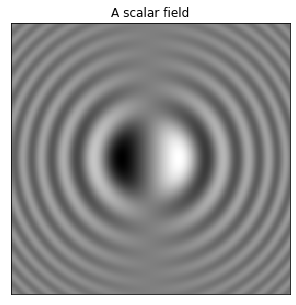

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x = np.linspace(-3., 3., 256)     #x coordinates arranged on [-3,3]
y = np.linspace(-3., 3., 256)     #y coordinates arranged on [-3,3]
X, Y = np.meshgrid(x, y)          #make the plot grid

Z = X * np.sinc(X ** 2 + Y ** 2)  #define the scalar field values at each point

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('A scalar field')
ax.axis([-3,3,-3,3])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "pcolormesh" function can be used to make a density plot.
ax.pcolormesh(X,Y,Z,shading='auto',cmap=cm.gray)
plt.show()

The most commonly encountered vector field quantities are velocity and force. A vector field can be represented using arrows, where the length of each arrow indicates the field strength at the point. The example below shows a plot of the vector field defined by
```{math}
:label: example_field
\underline{v}=(2x,-2y),\quad -2\leq x,y \leq 2.
```

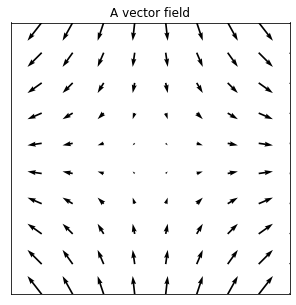

In [2]:
x=np.linspace(-2, 2, 10) #x coordinates arranged on [-2,2]
y=np.linspace(-2, 2, 10) #y coordinates arranged on [-2,2]

X,Y = np.meshgrid(x, y) #make the plot grid
(U,V)=(2*X,-2*Y)        #define the vector field values at each point

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('A vector field')
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "quiver" function is used in Python to make a vector plot. It gets its name from the apparatus that
# an archer uses to carry their arrows.
ax.quiver(X,Y,U,V)
plt.show()

If you draw curves tangent to the arrows of a vector field, these are called "field lines" or "streamlines". The plot below shows streamlines for the vector field given in the previous example, {eq}`example_field` . The field strength at each point is indicated by how close together the field lines are, assuming that the physical quantity being indicated by the field is *conserved*.

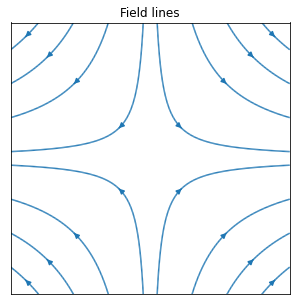

In [3]:
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title('Field lines')
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#----------------------------------
start=[ #start points of selected field lines
    [-1.6,-2],[-1.1,-2],[-0.6,-2],[-0.1,-2],
    [+1.6,-2],[+1.1,-2],[+0.6,-2],[+0.1,-2],
    [-1.6,+2],[-1.1,+2],[-0.6,+2],[-0.1,+2],
    [+1.6,+2],[+1.1,+2],[+0.6,+2],[+0.1,+2]]
#----------------------------------

ax.streamplot(X,Y,U,V,start_points=start,density=10) # stream plot

plt.show()

In SECTION, we will explore the concept of field lines in more detail, and we will discuss the difference between *streamlines*, *streaklines* and *particle paths*.

````{exercise}
:label: pot-fun
Some velocity fields, called *potential fields*, may be defined as the gradient of a scalar potential function $\phi(x,y,z)$. For example, the gravitational field $\underline{g}=(0,0,-g)$ can be made to satisfy $\underline{g}=\nabla\phi$ by taking $\phi=-gz$. You will learn about potential fields later in this course.

Consider a two-dimensional velocity field $\underline{v}=(u,v)$, which is defined by a potential function
```{math}
\phi=x e^{-x^2-y^2}.
```
Produce a vector plot of this field on the range $-2\leq x,y \leq 2$.
````

Streamlines, streaklines, and particle paths
A streamline is a curve that is parallel to the velocity field at a given (fixed) time $t$ and passes through a given point $\underline{r}_0$. Streamlines can be thought of as snapshots of the velocity field. If we parameterise the streamline by $\underline{r}(s)=\biggr(x(s),y(s)_,z(s)\biggr)$, then we will have

\begin{equation}\frac{\mathrm{d}\underline{r}}{\mathrm{d}s}=\underline{v}(\underline{r},t), \quad \underline{r}(0)=\underline{r}_0 \quad \text{(constant $t$)}.\end{equation}



A particle path is the trajectory traced by a single particle of fluid starting at a given position $\underline{r_0}$. We can find these paths by solving the problem

\begin{equation}\frac{\mathrm{d}\underline{r}}{\mathrm{d}t}=\underline{v}(\underline{r},t), \quad \underline{r}(t_0)=\underline{r}_0.\end{equation}





Note that if the flow is not steady then the streamlines do NOT coincide with the particle paths, since each snapshot will look different.





A streakline is the locus of all particles that have passed through a given point $\underline{r}_0$. This is what we see when we inject smoke or dye into a moving fluid. We can find streaklines by solving the particle path problem for a range of release times $t_0$. We may plot the result at a given time $t$.



Example

We will consider the velocity field

\begin{equation}\underline{v}=(1,-2te^{-t^2}),\end{equation}

and we will look at the trajectories of particles released from the point $(1,1)$.

We can solve

\begin{equation}\frac{\mathrm{d}x}{\mathrm{d}t}=1, \quad \frac{\mathrm{d}y}{\mathrm{d}t}=-2te^{-t^2}, \quad x(t_0)=1,\ y(t_0)=1\end{equation}

to obtain

\begin{equation}x-1=t-t_0, \quad y-1=e^{-t^2}-e^{-t_0^2}.\end{equation}

The animation below shows a sequence of particles injected into the fluid at intervals. The dynamic vector field is also shown on the plot. Due to the changing vector field, the particles follow different trajectories depending on the time of release. The $(x,y)$ trajectory of a particle released at time $t_0$ is given above. The set of particles together define a streakline.

particle trajectories





For this example, since the vector field has no spatial dependence, the streamlines are straight lines, with gradient $-2t e^{-t^2}$. The evolved velocity field is approximately steady, so after some time has elapsed the streaklines, pathlines and streamlines approximately coincide.

The following animation shows how the streakline for dye injected at $(1,1)$ evolves over the first five seconds. On the same plot the pathline for a particle released at $t=-$ is plotted. The animation was produced in Python.

streakline



Exercises
1. Calculate the streamlines and particle paths for the flow $\underline{v}=(\alpha,\beta t,0)$, where $\alpha, \beta$ are positive constants. Describe the shape of the each of your solutions.



2. Consider a two-dimensional flow given by $\underline{v}=(\alpha y, \alpha x,0)$. Is this flow steady? Find the streamlines and describe their shape. What is the relationship between the streamlines and the particle paths for this flow?



3. Consider a two-dimensional unsteady flow given by $\underline{v}=(3 x/t^2, -2 y/t^2,0)$.

(i) Show that the velocity field is irrotational and calculate its divergence.

(ii) Since the velocity field is irrotational, it can be derived from a potential $\phi(x,y)$. Find an expression for this function.

(iii) In which direction do the contours of the potential function $\phi$ lie in relation to the velocity field?

(iv) Calculate the equations of the streamlines and show that for this example the streamlines and particle paths are the same.



4. For the steady flow $\underline{v}=(2x,3y,-5z)$, compute the trajectories of particles starting on the ring $x=\cos(\theta)$, $y=\sin(\theta)$, $z=1$.

Show that the flow is both irrotational and solenoidal, and describe the motion of the fluid particles in words.


## Vorticity
Vorticity is a measure of the local rotation or spin of fluid particles. It is defined as the curl of the velocity vector $(u,v,w)$:

\begin{equation}\underline{\omega} = \nabla\times\underline{v}=\left(\frac{\partial w}{\partial y}-\frac{\partial v}{\partial z}\right)\underline{e}_x,+\left(\frac{\partial u}{\partial z}-\frac{\partial w}{\partial x}\right)\underline{e}_y+\left(\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}\right)\underline{e}_z\end{equation}

An illustrated interpretation of vorticity is given below, looking only at the $z$-component for simplicity. Note that the subscript notation used on the diagram represents partial differentiation, not a vector component. We consider two fluid line elements $AB$ and $AC$, which are aligned with the $x$ and $y$ axes, respectively. By the definition of the partial derivative, we can write

\begin{equation}v(x+\delta x,y,z,t)-v(x,y,z,t)=\frac{\partial v}{\partial x}\delta x\end{equation}

so

* $\displaystyle \frac{\partial v}{\partial x}$ represents the instantaneous angular velocity of the fluid line element $AB$
* $\displaystyle\frac{\partial u}{\partial y}$ represents the instantaneous angular velocity of the fluid line element $AC$
* The local anticlockwise spin about $A$ is therefore given by $\displaystyle \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}$.



vorticity illustration





It is important to recognise that the vorticity is not related to the global rotation of the fluid. To illustrate this, we will consider the vorticity of some basic flows, which are either rotating or not rotating.





Example 1: Shear flow

Consider a two-dimensional "shear" velocity profile described by $\underline{v}=(u(y),0,0).$

This flow is a rectilinear flow; meaning that it is not rotating as a whole, as can be seen from the image below. However, the vorticity is non-zero since fluid particles are rotated by the shearing force, as would be seen by an observer following the fluid.

velocity profile  

\begin{equation}\underline{\omega}=\begin{vmatrix}\underline{e}_x &\underline{e}_y &\underline{e}_z\\\frac{\partial}{\partial x}&\frac{\partial}{\partial y}&\frac{\partial}{\partial z}\\ u(y)& 0 & 0\end{vmatrix}=\left(0,0,-u^{\prime}(y)\right)\end{equation}

We see that the fluid elements rotate about the $z$ axis in a clockwise direction (due to the negative sign).



Example 2: Line vortex ('potential vortex')

Consider a flow described in cylindrical polars $(\rho,\theta,z)$, by the velocity profile $\underline{v}=\left(0,\frac{k}{\rho},0\right)$, where $k$ is a positive constant.

This flow is a swirling motion with velocity decreasing in the radial direction like $\frac{1}{\rho}$, as illustrated in the figure below

line_vortex



The vorticity is zero, meaning that fluid particles are swept round the origin without local rotation. To show this, we have to use the result for the gradient in cylindrical polars:

\begin{equation}\nabla\times \underline{v}=\frac{1}{\rho}\begin{vmatrix}\underline{e}_{\rho} & \rho\underline{e}_{\theta}& \underline{e}_z\\\frac{\partial }{\partial r}&\frac{\partial}{\partial \theta}&\frac{\partial}{\partial z}\\ v_{\rho}&\rho v_{\theta} & v_z\end{vmatrix}=\frac{1}{\rho}\begin{vmatrix}\underline{e}_{\rho} & \rho\underline{e}_{\theta}& \underline{e}_z\\\frac{\partial }{\partial r}&\frac{\partial}{\partial \theta}&\frac{\partial}{\partial z}\\ 0&k & 0\end{vmatrix}=\underline{0}\end{equation}

The surprising result occurs in this example because the slowing down of the fluid away from the origin is just the right strength to create a rotational shear that counterbalances the angular rotation of the fluid.



Helmhotz decomposition (fundamental theorem of calculus)
Any vector field that is smooth, defined everywhere in space and vanishes at infinity together with its first derivatives can be decomposed as follows:

\begin{equation}F=\nabla \phi +\nabla \times A\end{equation}

We will not prove this result, but we will use it to simplify the equations of motion in some scenarios.

The first term is irrotational (curl-free) from the vector identity “curlgrad=$\underline{0}$” and the second term is solenoidal (divergence-free) from the vector identity “divcurl=0”.




## The directional derivative

Here, we make use of the multivariate chain rule for a function $\phi(x,y,z)$ in the neighbourhood of a point $\underline{x}$ and we allow variations in an arbitrary direction $\mathrm{d}\underline{x}$:

\begin{align}\mathrm{d}\phi &=\frac{\partial \phi}{\partial x}\mathrm{d}x+\frac{\partial \phi}{\partial y}\mathrm{d}y+\frac{\partial \phi}{\partial z}\mathrm{d}z\\&=\left(\frac{\partial\phi}{\partial x},\frac{\partial\phi}{\partial y},\frac{\partial\phi}{\partial z}\right).\biggr(\mathrm{d}x,\mathrm{d}y,\mathrm{d}z\biggr)\\\Rightarrow \frac{\mathrm{d}\phi}{\mathrm{d}s}&=\underline{v}.\nabla\phi, \qquad \text{where }\underline{v}=\left(\frac{\mathrm{d}x}{\mathrm{d}s},\frac{\mathrm{d}y}{\mathrm{d}s},\frac{\mathrm{d}z}{\mathrm{d}s}\right)\end{align}

This result is called the directional derivative of $\phi$ in the direction $\underline{v}$. It is usually assumed that $\underline{v}$ is a unit vector, so the result may be denoted as follows:

\begin{equation}D_{\hat{\underline{v}}}(\phi)=\hat{\underline{v}}.\nabla\phi\end{equation}.


```{exercise}
:label: ex-dir_deriv

Find the gradient of the function $f(x,y,z)=xyz$ at the point $M:(-2,3,4)$.

What is the directional derivative of this function in the direction $\underline{v}=(3,-4,12)$?
```

## The gradient

From the definition of the scalar product, we know that

\begin{equation}\biggr|D_{\hat{\underline{v}}}\biggr|=\biggr|\nabla \phi\biggr| \biggr|\hat{\underline{v}}\biggr|\cos(\theta) = \biggr|\nabla \phi\biggr|\cos(\theta)\end{equation}

where $\theta$ is the angle between $\nabla \phi$ and the direction vector $\hat{\underline{v}}$.

The result is largest when $\theta=0$ and in this case $D_{\hat{\underline{v}}}=\nabla \phi$. Therefore, $\nabla \phi$ points in the direction of maximum increase of the function $\phi$ and has magnitude equal to the rate of maximum increase. The gradient is also perpendicular to the level sets of $\phi$, since on a level set $\mathrm{d}\phi=0$.

The gradient of $\phi(x,y,z)$ will be perpendicular to the surface $\phi=c$, and we can use this to find the tangent plane to the surface at a given point.

The gradient of $z=z(x,y)$ will be perpendicular to the contours of $z$, projected in the $(x,y)$ plane, as illustrated in the figure below.

A contour plot of the surface $z=x^3-y^3-2xy+2$, together with the gradient field given by $\nabla z = (3x^2-2y,-36^2-2x,0)$,



## What is **flux**?

Consider a small (strictly infinitesimal) surface element $S$ within a field $\underline{F}$, such that the surface normal makes an angle $\theta$ to the direction of the field, as shown. The components of the field in directions parallel and perpendicular to the surface are illustrated in blue. The perpendicular component has magnitude $F\cos{\theta}$. The parallel component remains bounded by the surface.

<br>

```{image} navstok_img/flux1.png
---
name: flux
alt: alternative description
align: center
scale: 80%
---
```
<br>

Multiplying the normal component of the field by the area of the surface element gives the volume indicated by the shaded cylinder in the image below. It is a scalar quantity, which tells us the instantaneous rate of flow through the surface per unit time. Mathematically, the flow rate across the surface $S$ is given by

\begin{equation}\underline{F}.\underline{S}=\underline{F}.\hat{\underline{n}}S = FS\cos{\theta},\end{equation}
where $\hat{\underline{n}}$ is the unit normal to the surface.

<br>

```{image} navstok_img/flux2.png
---
name: flux
alt: alternative description
align: center
scale: 80%
---
```
<br>

The quantity $\underline{F}.\hat{\underline{n}}$ gives the flow rate *per unit area*, which is called the flux. Integrating the flux over a given finite surface area $A$ is equivalent to summing the individual surface element contributions to the flow rate, in the limit. The resulting flow rate $Q$ is given by

\begin{equation}Q=\int_A{\underline{F}.d\underline{\mathrm{S}}}\end{equation}

Most authors (including me!) use the terms flow rate and flux interchangeably, though flux is more pedantically defined as the flow rate per **unit** area. However, the intended meaning is almost always clear from the context and the surrounding text.

```{admonition} Examples
Net volumetric flux is the rate of volume flow across a given area, $\displaystyle \int_A\underline{v}.d\underline{S}$

Net mass flux is the rate of mass flow across a given area, $\displaystyle \int_A \rho\underline{v}.d\underline{S}$
```

Notice that the flux $\underline{F}.\hat{\underline{n}}$ is directly proportional to the field strength $F$. For this reason, the field strength is sometimes referred to as the *flux density*. This description fits quite well with field line depictions, since the field strength can be inferred from how close together (dense) the field lines are. However, the term flux density is more commonly used in the context of electricity and magnetism, and I will not use it in the fluids part of this module.

## What is **divergence**?
Suppose that a given point within  a field $\underline{F}=(f_x,f_y,f_z)$ is surrounded by a **closed** surface, $S$ as illustrated below:

```{image} navstok_img/source.png
---
name: source_fun
alt: alt text
align: center
scale: 80%
---
```

It can be shown (divergence theorem) that the flux $Q$ through surface $S$ is equivalent to a volume integral:
```{math}
:label: divergence_thm
Q=\oint_S \underline{F}.d\underline{S} \equiv \int_V (\nabla.\underline{F})dV,
````
where the *divergence* $\nabla.\underline{F}$ is given by:
\begin{equation}\nabla.\underline{F}=\biggr(\frac{\partial f_x}{\partial x},\frac{\partial f_y}{\partial y},\frac{\partial f_z}{\partial z}\biggr).\end{equation}

By applying the Fundamental Theorem of Calculus to {eq}`divergence_thm`, we obtain the result
\begin{equation}\nabla.\underline{F}=\frac{\mathrm{d}Q}{\mathrm{d}V}=\lim_{V\rightarrow 0} \frac{\oint_S \underline{F}.d\underline{S}}{V}\end{equation}

Hence, divergence can be understood as the flux per unit volume through an infinitesimally-small closed surface surrounding a point. A point with positive divergence behaves like a source, and a point with negative divergence behaves like a sink.

```{admonition} See also
:class: readmore
For further discussion of the divergence theorem and related concepts, visit
[Khan Academy](https://www.khanacademy.org/math/multivariable-calculus/greens-theorem-and-stokes-theorem/divergence-theorem-articles/a/3d-divergence-theorem)
```

```{exercise}
:label: ex-divergence
Calculate the divergence of the potential flow you looked at in {numref}`pot-fun`, and produce a grayscale plot of the divergence on the range $-2\leq x,y \leq 2.$
```

## The material derivative
According to the chain rule for an arbitrary function $\phi(t,\underline{x})$,

```{math}
:label: chainrule
\frac{\mathrm{d}\phi}{\mathrm{d}t}=\frac{\partial \phi}{\partial t}+\frac{\mathrm{d}\underline{x}}{\mathrm{d}t}.\nabla\phi
```

If we put $\frac{\mathrm{d}\underline{x}}{\mathrm{d}t}=\underline{v}$, which is the velocity following a fluid element along the path of the fluid, then we obtain the material derivative:

```{math}
:label: materialderivative
\frac{D\phi}{Dt}=\frac{\partial \phi}{\partial t}+\underline{v}.\nabla\phi
```

The differential operator $\frac{D}{Dt}$ is called the "material derivative" or "convective derivative".

The operator $\underline{v}.\nabla$ gives the directional derivative tangent to $\underline{v}$. It is often called convection, meaning transport that arises due to the existence of a field (in this case a velocity field). For example, $\underline{v}.\nabla\underline{v}$ is called convective acceleration.

An illustration of the idea is shown below.

<br>

```{image} navstok_img/potentialfun.gif
---
name: potential_fun
alt: a particle moving through a potential field
align: center
scale: 80%
---
```
<br>




Suppose that a fluid particle follows the path marked in blue through the potential field $\phi$, which is indicated by the background colour scheme and equipotential contours shown. The vectors (arrows) shown on the plot depict the instantaneous gradient field of $\phi$. At each point on the trajectory, the experienced change in $\phi$ is given by the projection of the particle's own direction vector $\underline{v}$ with the gradient field, $\nabla \phi$, plus the instantaneous change in the potential field $\phi$ at that point due to time evolution.

The material derivative can also be applied to each element of a vector field $\underline{\phi}$, to give the change in $\underline{\phi}$ following the motion of a fluid particle.

An interesting example description of these ideas can be found at https://www.youtube.com/watch?v=l4F2bZgwcpU

## Solutions

```{solution} ex-dir_deriv
:class: dropdown

$\nabla f = \left(yz,xz,xy\right) \Rightarrow (\nabla f)_M=\left(12,-8,-6\right)$

$D_{\hat{\underline{v}}}f=\hat{\underline{v}}.(\nabla f)_M = \frac{1}{\sqrt{3^2+4^2+12^2}}\left(3,-4,12\right).\left(12,-8,-6\right)=\frac{-4}{13}$
```